<a href="https://colab.research.google.com/github/udayanjansai/Naive_Bayes_Model/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
# Read the CSV file
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam.csv", encoding='latin-1')[['v1', 'v2' ]]
df.columns = ['label', 'text' ]
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# Feature Engineering: Extract numerical features
df['text_length'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))
df['num_digits'] = df['text'].apply(lambda x: sum(c.isdigit() for c in x))

In [33]:
df.head()

,label,text,text_length,num_words,num_digits
0,0,"Go until jurong point, crazy.. Available only ...",111,20,0
1,0,Ok lar... Joking wif u oni...,29,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,25
3,0,U dun say so early hor... U c already then say...,49,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [34]:
from sklearn.model_selection import train_test_split
# Define features and target
X = df[['text_length', 'num_words', 'num_digits']]
y = df['label']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [36]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred_gaus=model.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred_gaus)

0.9802690582959641

In [38]:
confusion_matrix(y_test,y_pred_gaus)

array([[953,  12],
       [ 10, 140]])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_gaus))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



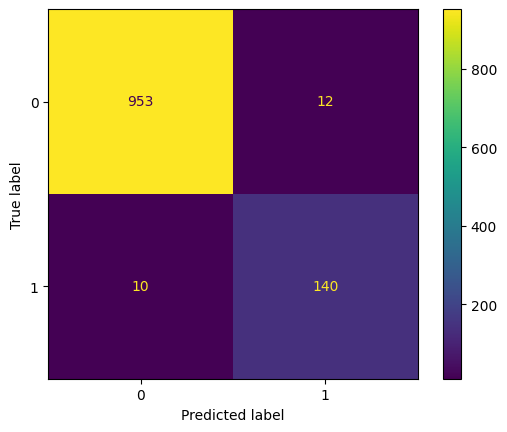

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_gaus)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [41]:
X=df['text']
y=df['label']

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Convert text data into word count vectors
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['text'])

# Convert counts to TF-IDF representation
tfidf_transformer = TfidfTransformer() # it will calculate frequency of words
X_tfidf = tfidf_transformer.fit_transform(X_counts)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

# Train Multinomial Naïve Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

In [43]:
accuracy_score(y_test,y_pred_mnb)

0.968609865470852

In [44]:
mnb_cm=confusion_matrix(y_test,y_pred_mnb)
mnb_cm

array([[965,   0],
       [ 35, 115]])

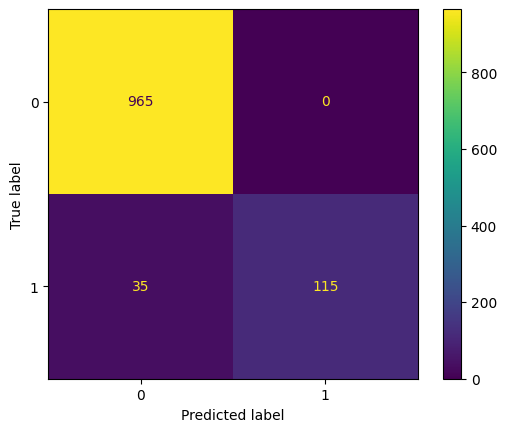

In [45]:
disp=ConfusionMatrixDisplay(confusion_matrix=mnb_cm,display_labels=mnb.classes_)
disp.plot()
plt.show()

In [46]:
# Convert text into binary presence/absence of important words
important_words = ["free", "win", "offer", "money", "urgent"]
for word in important_words:
  df[word] = df['text'].apply(lambda x: 1 if word in x.lower() else 0)

In [47]:
df.head()

,label,text,text_length,num_words,num_digits,free,win,offer,money,urgent
0,0,"Go until jurong point, crazy.. Available only ...",111,20,0,0,0,0,0,0
1,0,Ok lar... Joking wif u oni...,29,6,0,0,0,0,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,25,1,1,0,0,0
3,0,U dun say so early hor... U c already then say...,49,11,0,0,0,0,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,0,0,0,0,0


In [48]:
X=df[['free','win','offer','money','urgent']]
y=df['label']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred_bnb)

0.895067264573991

In [51]:
bnb_cm=confusion_matrix(y_test,y_pred_bnb)
bnb_cm

array([[929,  36],
       [ 81,  69]])

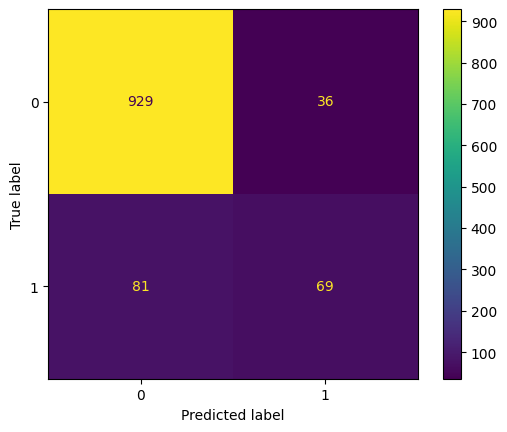

In [52]:
bnb_disp=ConfusionMatrixDisplay(confusion_matrix=bnb_cm,display_labels=bnb.classes_)
bnb_disp.plot()
plt.show()

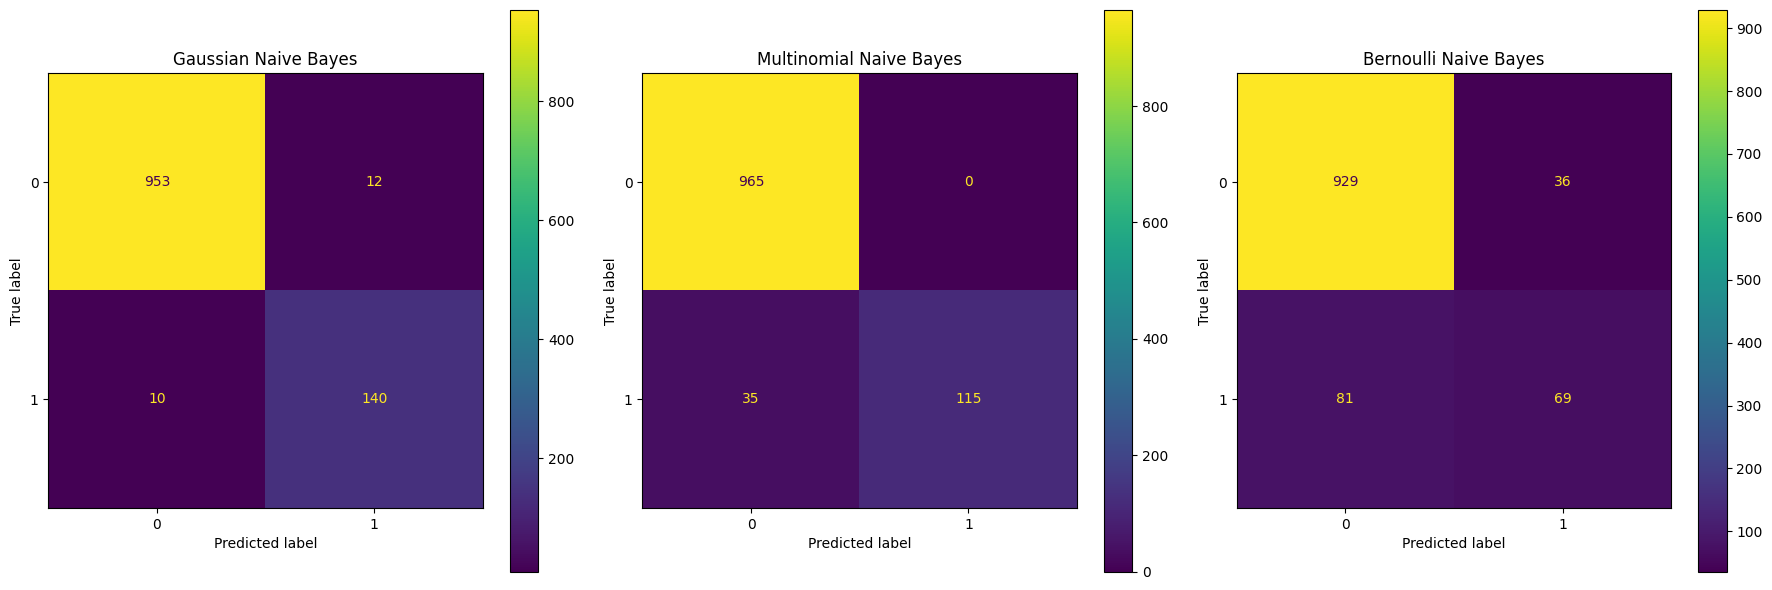

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB # Explicitly import if needed here

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GNB (Gaussian Naive Bayes)
# Re-create the specific X_test and y_test for GNB plotting
X_gnb_features = df[['text_length', 'num_words', 'num_digits']]
y_gnb_labels = df['label']

# Assuming X_train_original and y_train_original for GNB are defined earlier
# or re-splitting and scaling here
# For GNB, we need to re-run the split and scaling logic as it was originally done
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(
    X_gnb_features, y_gnb_labels, test_size=0.2, random_state=42)

sc_gnb = StandardScaler()
X_train_gnb_scaled = sc_gnb.fit_transform(X_train_gnb)
X_test_gnb_scaled = sc_gnb.transform(X_test_gnb)

# Ensure the 'model' variable is still the GaussianNB model as intended
# (it was overwritten in the notebook, so let's use the original 'model' if it was GaussianNB)
# If 'model' was overwritten, we might need to re-instantiate and re-fit, but based on the context
# 'model' likely refers to the original GaussianNB. Let's confirm by looking at m98RyoO6xXK1 and VprmT_Hc5WYo.
# From m98RyoO6xXK1: model = GaussianNB()
# From VprmT_Hc5WYo: model = MultinomialNB() -> This overwrites model!
# So we need to re-instantiate GaussianNB or use a different variable name.
# To avoid re-fitting, let's assume `model` in `m98RyoO6xXK1` was meant for GNB.
# A safer approach is to re-declare and re-fit GNB here if 'model' was truly overwritten.
# As per the latest notebook state, 'model' now refers to the MultinomialNB from VprmT_Hc5WYo.
# So, we need to re-instantiate and re-fit GaussianNB.

gnb_model_for_plot = GaussianNB()
gnb_model_for_plot.fit(X_train_gnb_scaled, y_train_gnb)

ConfusionMatrixDisplay.from_estimator(gnb_model_for_plot, X_test_gnb_scaled, y_test_gnb, ax=axes[0])
axes[0].set_title("Gaussian Naive Bayes")

# MNB (Multinomial Naive Bayes)
# Re-split x_tfidf (which is X_tfidf from cell _mrE4CFYydxY)
_, x_test_mnb_plot, _, y_test_mnb_plot = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)
ConfusionMatrixDisplay.from_estimator(mnb, x_test_mnb_plot, y_test_mnb_plot, ax=axes[1])
axes[1].set_title("Multinomial Naive Bayes")

# BNB (Bernoulli Naive Bayes)
# The global X_test and y_test are currently set to the BNB split, which is what we need here.
# The 'bnb' model is available from Is6H9F1e01Q1.
ConfusionMatrixDisplay.from_estimator(bnb, X_test, y_test, ax=axes[2])
axes[2].set_title("Bernoulli Naive Bayes")

plt.tight_layout()
plt.show()

In [54]:
df['label'].value_counts()


,count
label,
0,4825
1,747


In [55]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english'
)

X = vectorizer.fit_transform(df['text'])
y = df['label']


In [56]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 43478 stored elements and shape (5572, 8404)>
  Coords	Values
  (0, 4224)	1
  (0, 5741)	1
  (0, 2271)	1
  (0, 1271)	1
  (0, 1703)	1
  (0, 3534)	1
  (0, 8227)	1
  (0, 4349)	1
  (0, 1701)	1
  (0, 1994)	1
  (0, 3494)	1
  (0, 1051)	1
  (0, 8026)	1
  (1, 5343)	1
  (1, 4385)	1
  (1, 4192)	1
  (1, 8134)	1
  (1, 5369)	1
  (2, 3265)	1
  (2, 2875)	2
  (2, 8185)	1
  (2, 2110)	1
  (2, 8146)	1
  (2, 3005)	2
  (2, 2329)	1
  :	:
  (5567, 309)	1
  (5567, 700)	1
  (5567, 5801)	1
  (5567, 165)	1
  (5567, 5264)	1
  (5568, 3789)	1
  (5568, 3463)	1
  (5568, 8390)	1
  (5568, 3252)	1
  (5568, 2907)	1
  (5569, 4992)	1
  (5569, 5673)	1
  (5569, 7168)	1
  (5570, 3265)	1
  (5570, 8071)	1
  (5570, 4485)	1
  (5570, 2532)	1
  (5570, 3373)	1
  (5570, 1737)	1
  (5570, 3587)	1
  (5570, 4040)	1
  (5570, 900)	1
  (5570, 1500)	1
  (5571, 7656)	1
  (5571, 6323)	1


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [58]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [59]:
y_pred = model.predict(X_test)


In [60]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9802690582959641

Confusion Matrix:
 [[954  11]
 [ 11 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.93      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [61]:
cm = confusion_matrix(y_test, y_pred)

TP = cm[1, 1]
FP = cm[0, 1]

print("Suspicious messages correctly identified (TP):", TP)
print("Genuine messages incorrectly flagged (FP):", FP)


Suspicious messages correctly identified (TP): 139
Genuine messages incorrectly flagged (FP): 11


In [62]:
def predict_message(text):
    text_vec = vectorizer.transform([text])
    return model.predict(text_vec)[0]

# Test examples
print(predict_message("Congratulations! You have won a free lottery"))
print(predict_message("Can we meet tomorrow for project discussion?"))


1
0


In [63]:
input_text=input()
print(predict_message(input_text))

congrats you are selected
1
